# <font color="maroon">Chapter 5: Cross-Correlated Dynamics via iRED</font>

One approach to interpreting detector analyses is to understand how local motion is connected to overall motion. In this tutorial, we will perform cross-correlation analysis via [iRED](https://pubs.acs.org/doi/10.1021/ja012750u). This analysis has been applied to identify mode dynamics in [HET-s(218-289)](https://onlinelibrary.wiley.com/doi/full/10.1002/anie.201901929) and establish connections between the G-protein binding site and other locations in [GHSR](https://onlinelibrary.wiley.com/doi/10.1002/anie.202302003).

## Setup and data downloads
Since we've learned now how pyDR is organized and allows us to manage larger data sets, we'll now use the full project functionality.

In [5]:
# SETUP pyDR
import sys
sys.path.append('..') #Path to pyDR (make sure this is correct if working locally)

In [2]:
#Imports
import pyDR

In [3]:
# Project Creation and File loading
proj=pyDR.Project()

sel=pyDR.MolSelect(topo='../pyDR/examples/HETs15N/backboneB.pdb',
                   traj_files='../pyDR/examples/HETs15N/backboneB.xtc',
                   project=proj)  #Selection object

# Specify the bond select to analyze for MD
sel.select_bond('N',segids='B')

## Load and process MD without and with iRED
When using iRED, it's important to compare the dynamics obtained with iRED and with a direct calculation of the detector responses. iRED works by determining modes of reorientational motion that are independent from each other. Then, the cross-correlation between modes is, by definition, zero at the initial time. However, there is no guarantee that the modes remain independent at a later time. If the direct and iRED calculations are in good agreement for a given bond, then the majority of motion for that bond results from independent mode motions. However, if not, then the total motion of that bond may have significant contributions from lagged cross-correlation between bonds, and the iRED analysis is especially representative of its total motion.

Note that we'll do a rank 1 calculation here for iRED, since it simplifies the orientational dependence of iRED.

In [6]:
sel.traj.step=10  #Take every tenth point for MD calculation (set to 1 for more accurate calculation)
pyDR.Defaults['ProgressBar']=False #Turns of the Progress bar (screws up webpage compilation)

pyDR.md2data(sel,rank=1) #Direct calculation
ired=pyDR.md2iRED(sel,rank=1)  #iRED object
ired.iRED2data() #Send iRED results to proj

r:IREDMODE:rk1:backboneB with 70 data points


Next, we set up the detectors for the raw data. We'll do a pre-processing with 10 unoptimized detectors.

In [12]:
proj['raw'].detect.r_no_opt(10)
_=proj['raw'].fit()

Data already in project (index=2)
Data already in project (index=3)
Fitted 2 data objects


Next, we use 7 optimized detectors, and finally conclude with an optimization of the results, including cleanup of the detector sensitivities.

In [13]:
proj['no_opt'].detect.r_auto(7)
proj['no_opt'].fit()
proj['proc'].opt2dist(rhoz_cleanup=True)

Fitted 2 data objects
Optimized 2 data objects
pyDIFRATE project with 2 data sets

Titles:
p7:MD:rk1:backboneB
p7:IREDMODE:rk1:backboneB


We now plot the results of the direct and iRED analysis.

## Plot the results

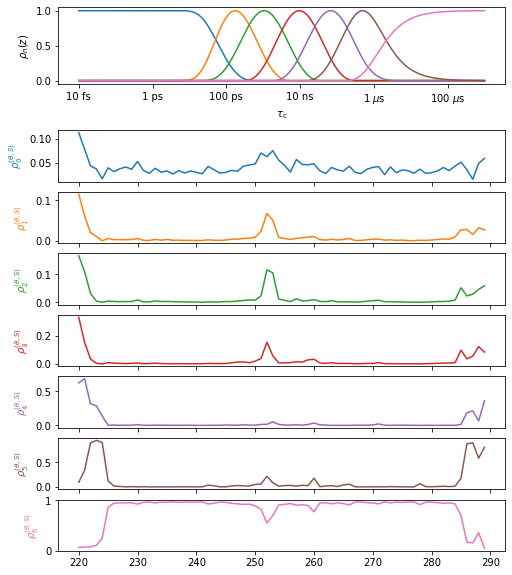

In [20]:
proj.close_fig('all')
proj['opt_fit']['MD'].plot().fig.set_size_inches([8,10])

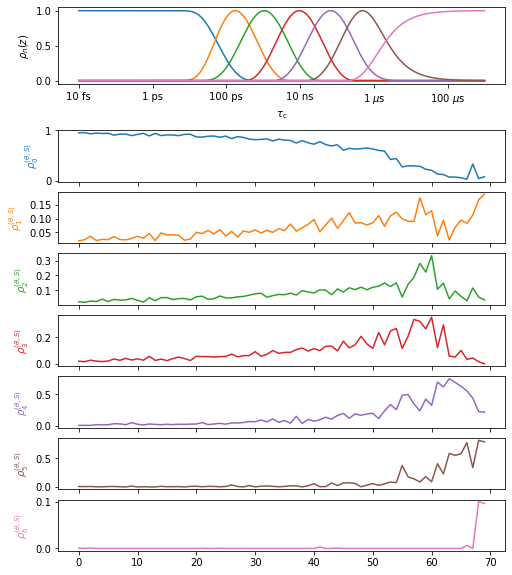

In [21]:
proj.close_fig('all')
proj['opt_fit']['iREDmode'].plot().fig.set_size_inches([8,10])

The second plot is completely different than the first. So what's happening? In fact, this is the detector analysis of the iRED modes, where those modes still need to be projected onto the bonds. The modes are sorted by size, from smallest to largest, where the tendency is that larger modes are also slower, although this is certainly not an absolute rule.

Modes are converted to bonds using .modes2bonds. We will run this and then overlay the results with the direct calculation.

In [22]:
proj.modes2bonds()

Converted 4 iRED data objects from modes to bonds
pyDIFRATE project with 12 data sets

Titles:
r:MD:rk1:backboneB
r:IREDMODE:rk1:backboneB
n10:MD:rk1:backboneB
n10:IREDMODE:rk1:backboneB
p7:MD:rk1:backboneB
p7:IREDMODE:rk1:backboneB
o7:MD:rk1:backboneB
o7:IREDMODE:rk1:backboneB
n:IREDBOND:rk1:backboneB
p10:IREDBOND:rk1:backboneB
p7:IREDBOND:rk1:backboneB
o7:IREDBOND:rk1:backboneB


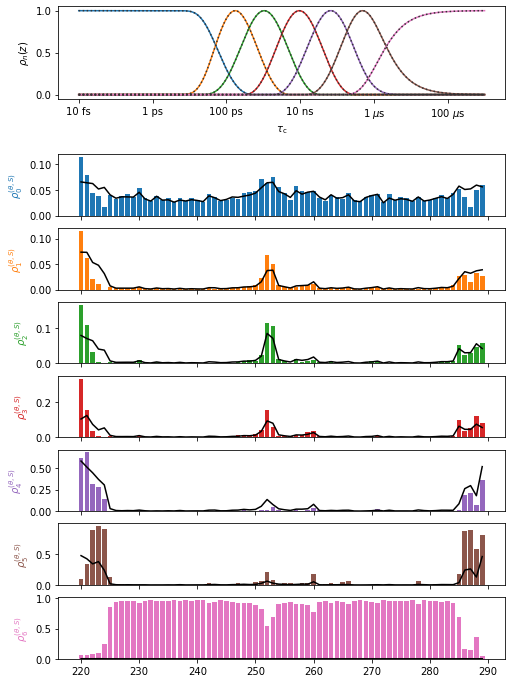

In [25]:
proj.close_fig('all')
proj['opt_fit']['MD'].plot(style='bar').fig.set_size_inches([8,12])
proj['opt_fit']['iREDbond'].plot()

In particularly flexible regions, there is some disagreement between the two analyses, but otherwise we have done fairly well. In these flexibly regions, we should keep in mind that mode dynamics yields an incomplete description of the total motion and the cross-correlation coefficients are not representing the full motion.

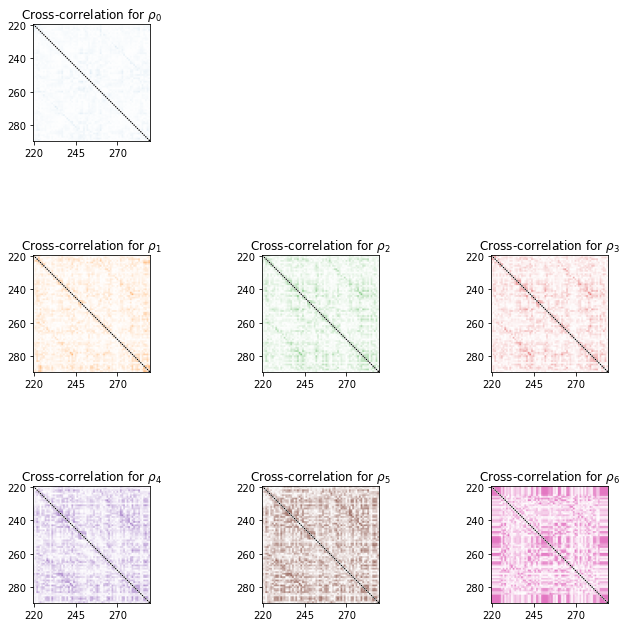

In [32]:
proj['opt_fit']['iREDbond'].plot_CC('all')[0].figure.set_size_inches([10,10])

<AxesSubplot:title={'center':'Cross-correlation for $\\rho_0$'}>

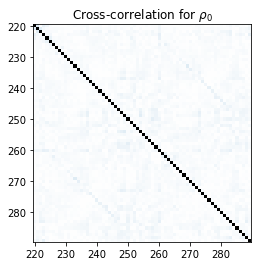

In [29]:
data.plot_CC(0)